In [1]:
#!pip install sklearn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.metrics import mean_squared_error

import importlib
import simple_rnn

 
from simple_rnn import train, hidden_dim, seq_len, sigmoid, output_dim



from simple_rnn import train, hidden_dim, seq_len, sigmoid, output_dim

importlib.reload(simple_rnn)

<module 'simple_rnn' from '/Users/rodrigo/Documents/SourcesCodes/GitHub/aprendizaje profundo centrogeo/simple_rnn.py'>

In [3]:
sin_wave = np.array([math.sin(x) for x in range(200)])

# training data

X = []
Y = []

num_records = len(sin_wave) - seq_len # 50
 
# X entries are 50 data points
# Y entries are the 51st data point

#Vector entrada X [-1,-0.5,0,0.5,1,0.5] [??]

for i in range(num_records-50):
    X.append(sin_wave[i:i+seq_len])
    Y.append(sin_wave[i+seq_len])

    
X = np.expand_dims(np.array(X), axis=2) # 100 x 50 x 1
Y = np.expand_dims(np.array(Y), axis=1) # 100 x 1
print(X.shape)
print(Y.shape)

# validation data
X_validation = []
Y_validation = []
for i in range(num_records-seq_len, num_records):
    X_validation.append(sin_wave[i:i+seq_len])
    Y_validation.append(sin_wave[i+seq_len])
    
X_validation = np.expand_dims(np.array(X_validation), axis=2)

Y_validation = np.expand_dims(np.array(Y_validation), axis=1)


(100, 50, 1)
(100, 1)


In [4]:
X.shape

(100, 50, 1)

In [5]:
Y.shape

(100, 1)

In [6]:
#inicialización de las matrices de pesos

np.random.seed(12161)
U = np.random.uniform(0, 1, (hidden_dim, seq_len)) # weights from input to hidden layer
print(U.shape)
W = np.random.uniform(0, 1, (hidden_dim, hidden_dim)) # recurrent weights for layer (RNN weigts)
print(W.shape)

#print("h.shape ", activation.shape)

V = np.random.uniform(0, 1, (output_dim, hidden_dim)) # weights from hidden to output layer
print(V.shape)






(100, 50)
(100, 100)
(1, 100)


In [7]:
hidden_dim = 100

#h^{0}
prev_activation = np.zeros((hidden_dim, 1))

x = X[0]

timestep = 10

new_input = np.zeros(x.shape)

new_input[timestep] = x[timestep] # define a single input for that timestep

print(U.shape , "x", new_input.shape, " = ", np.dot(U,new_input).shape)


mulw = np.dot(W, prev_activation)
#_sum = mulu + mulw
#print(_sum.shape , "sum")
            
#eq 10.9
#activation = sigmoid(_sum)
            
#eq 10.10
mulv = np.dot(V, activation)
print(V.shape , "x", activation.shape, " = ", mulv.shape)


(100, 50) x (50, 1)  =  (100, 1)


NameError: name 'activation' is not defined

In [10]:
#Y.shape[0]
U

array([[0.51943713, 0.39377852, 0.33445986, ..., 0.94047978, 0.13536373,
        0.83134348],
       [0.70951047, 0.32481439, 0.52442445, ..., 0.70151947, 0.8827805 ,
        0.34415121],
       [0.96402366, 0.8035712 , 0.86107335, ..., 0.76879634, 0.4102766 ,
        0.15621609],
       ...,
       [0.58349375, 0.20023709, 0.63626362, ..., 0.0572619 , 0.48973874,
        0.44282376],
       [0.42959037, 0.51480157, 0.15393691, ..., 0.91547538, 0.43736747,
        0.14448688],
       [0.41387547, 0.85480505, 0.82842214, ..., 0.82905345, 0.75726233,
        0.14182838]])

In [11]:
U, V, W = train(U, V, W, X, Y, X_validation, Y_validation)

Epoch: 1, Loss: 125967.55155852718, Validation Loss: 62981.80009873551
Epoch: 2, Loss: 80779.38091801037, Validation Loss: 40388.10055253874
Epoch: 3, Loss: 45591.21027738495, Validation Loss: 22794.401006287568
Epoch: 4, Loss: 20403.038888946197, Validation Loss: 10200.701085393293
Epoch: 5, Loss: 5215.830762967877, Validation Loss: 2607.4801936162294
Epoch: 6, Loss: 73.24758974194985, Validation Loss: 36.52387222302899
Epoch: 7, Loss: 21.67771826176328, Validation Loss: 10.810884970154964
Epoch: 8, Loss: 20.84788103487053, Validation Loss: 10.39561893116071
Epoch: 9, Loss: 21.07787896824739, Validation Loss: 10.506872060481
Epoch: 10, Loss: 21.01768070350092, Validation Loss: 10.478509335437915
Epoch: 11, Loss: 20.53186604930574, Validation Loss: 10.238540184560195
Epoch: 12, Loss: 20.780482429279385, Validation Loss: 10.36105349726775
Epoch: 13, Loss: 21.201257073303353, Validation Loss: 10.574473664219433
Epoch: 14, Loss: 20.839282658140913, Validation Loss: 10.389852937778748
Epoc

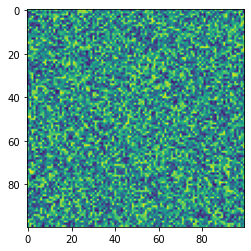

In [12]:
plt.imshow(W)

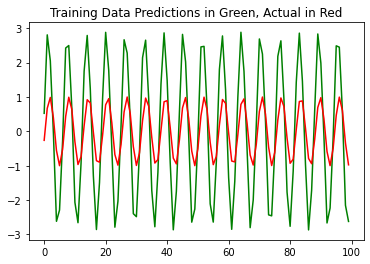

In [13]:
# predictions on the training set
predictions = []
for i in range(Y.shape[0]):
    x, y = X[i], Y[i]
    prev_activation = np.zeros((hidden_dim,1))
    # forward pass
    for timestep in range(seq_len):
        mulu = np.dot(U, x)
        mulw = np.dot(W, prev_activation)
        _sum = mulu + mulw
        activation = sigmoid(_sum)
        mulv = np.dot(V, activation)
        prev_activation = activation
    predictions.append(mulv)
 
predictions = np.array(predictions)
 
plt.plot(predictions[:, 0,0], 'g')
plt.plot(Y[:, 0], 'r')
plt.title("Training Data Predictions in Green, Actual in Red")
plt.show()

In [22]:
#https://pythonalgos.com/build-a-recurrent-neural-network-from-scratch-in-python-3/#introduction-to-recurrent-neural-networks

#https://towardsdatascience.com/backpropagation-in-rnn-explained-bdf853b4e1c2#:~:text=You%20see%2C%20a%20RNN%20essentially,where%20they%20are%20summed%20up.
#https://pythonalgos.com/build-a-recurrent-neural-network-from-scratch-in-python-3/#introduction-to-recurrent-neural-networks

#no tan buena introducción

#https://machinelearningmastery.com/gentle-introduction-backpropagation-time/

In [23]:
np.arange(100)*np.ones_like(W)

array([[ 0.,  1.,  2., ..., 97., 98., 99.],
       [ 0.,  1.,  2., ..., 97., 98., 99.],
       [ 0.,  1.,  2., ..., 97., 98., 99.],
       ...,
       [ 0.,  1.,  2., ..., 97., 98., 99.],
       [ 0.,  1.,  2., ..., 97., 98., 99.],
       [ 0.,  1.,  2., ..., 97., 98., 99.]])